In [54]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
data = pd.read_csv("data/input/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [58]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [59]:
for val in data:
    print(f"- {val}")

- id
- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15


In [60]:
data['date'] = pd.to_datetime(data['date'])
# data['year'] = data['date'].dt.year
# data['month'] = data['date'].dt.month
# data['day'] = data['date'].dt.day
# data.drop('date', axis=1, inplace=True)
# data2 = data.drop(['date'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

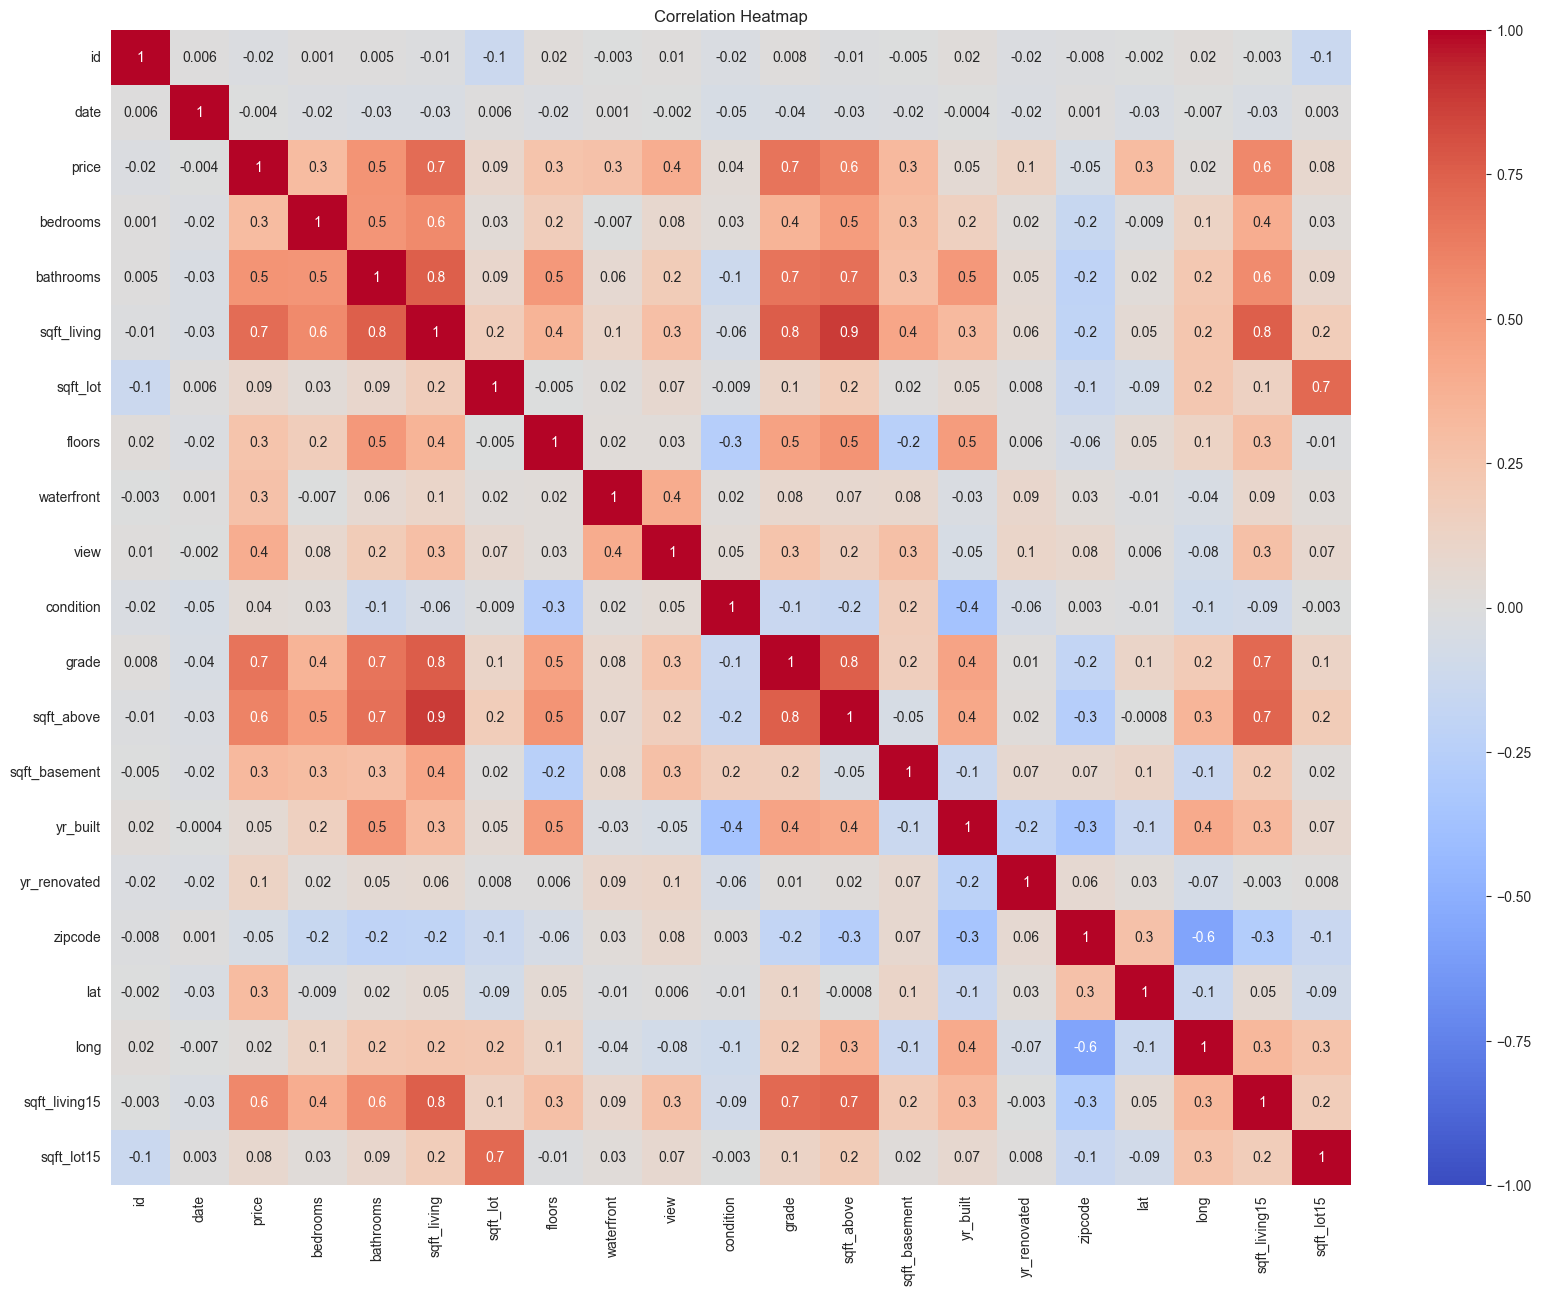

In [61]:
plt.figure(figsize=(20, 15))
corr = data.corr()
corr_heatmap = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.1g', cmap='coolwarm')
corr_heatmap.set_title('Correlation Heatmap')
plt.savefig("data/output/correlation_heatmap.png")

In [62]:
most_correlated_features = ['price']
counter = 0
for col_name, val in corr['price'].sort_values(ascending=False).items():
    if col_name != 'price':
        most_correlated_features.append(col_name)
        counter += 1
    if counter > 7:
        break
print(most_correlated_features)

['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']


In [63]:
data.drop("date", axis=1, inplace=True)
data.drop("id", axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Figure size 640x480 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

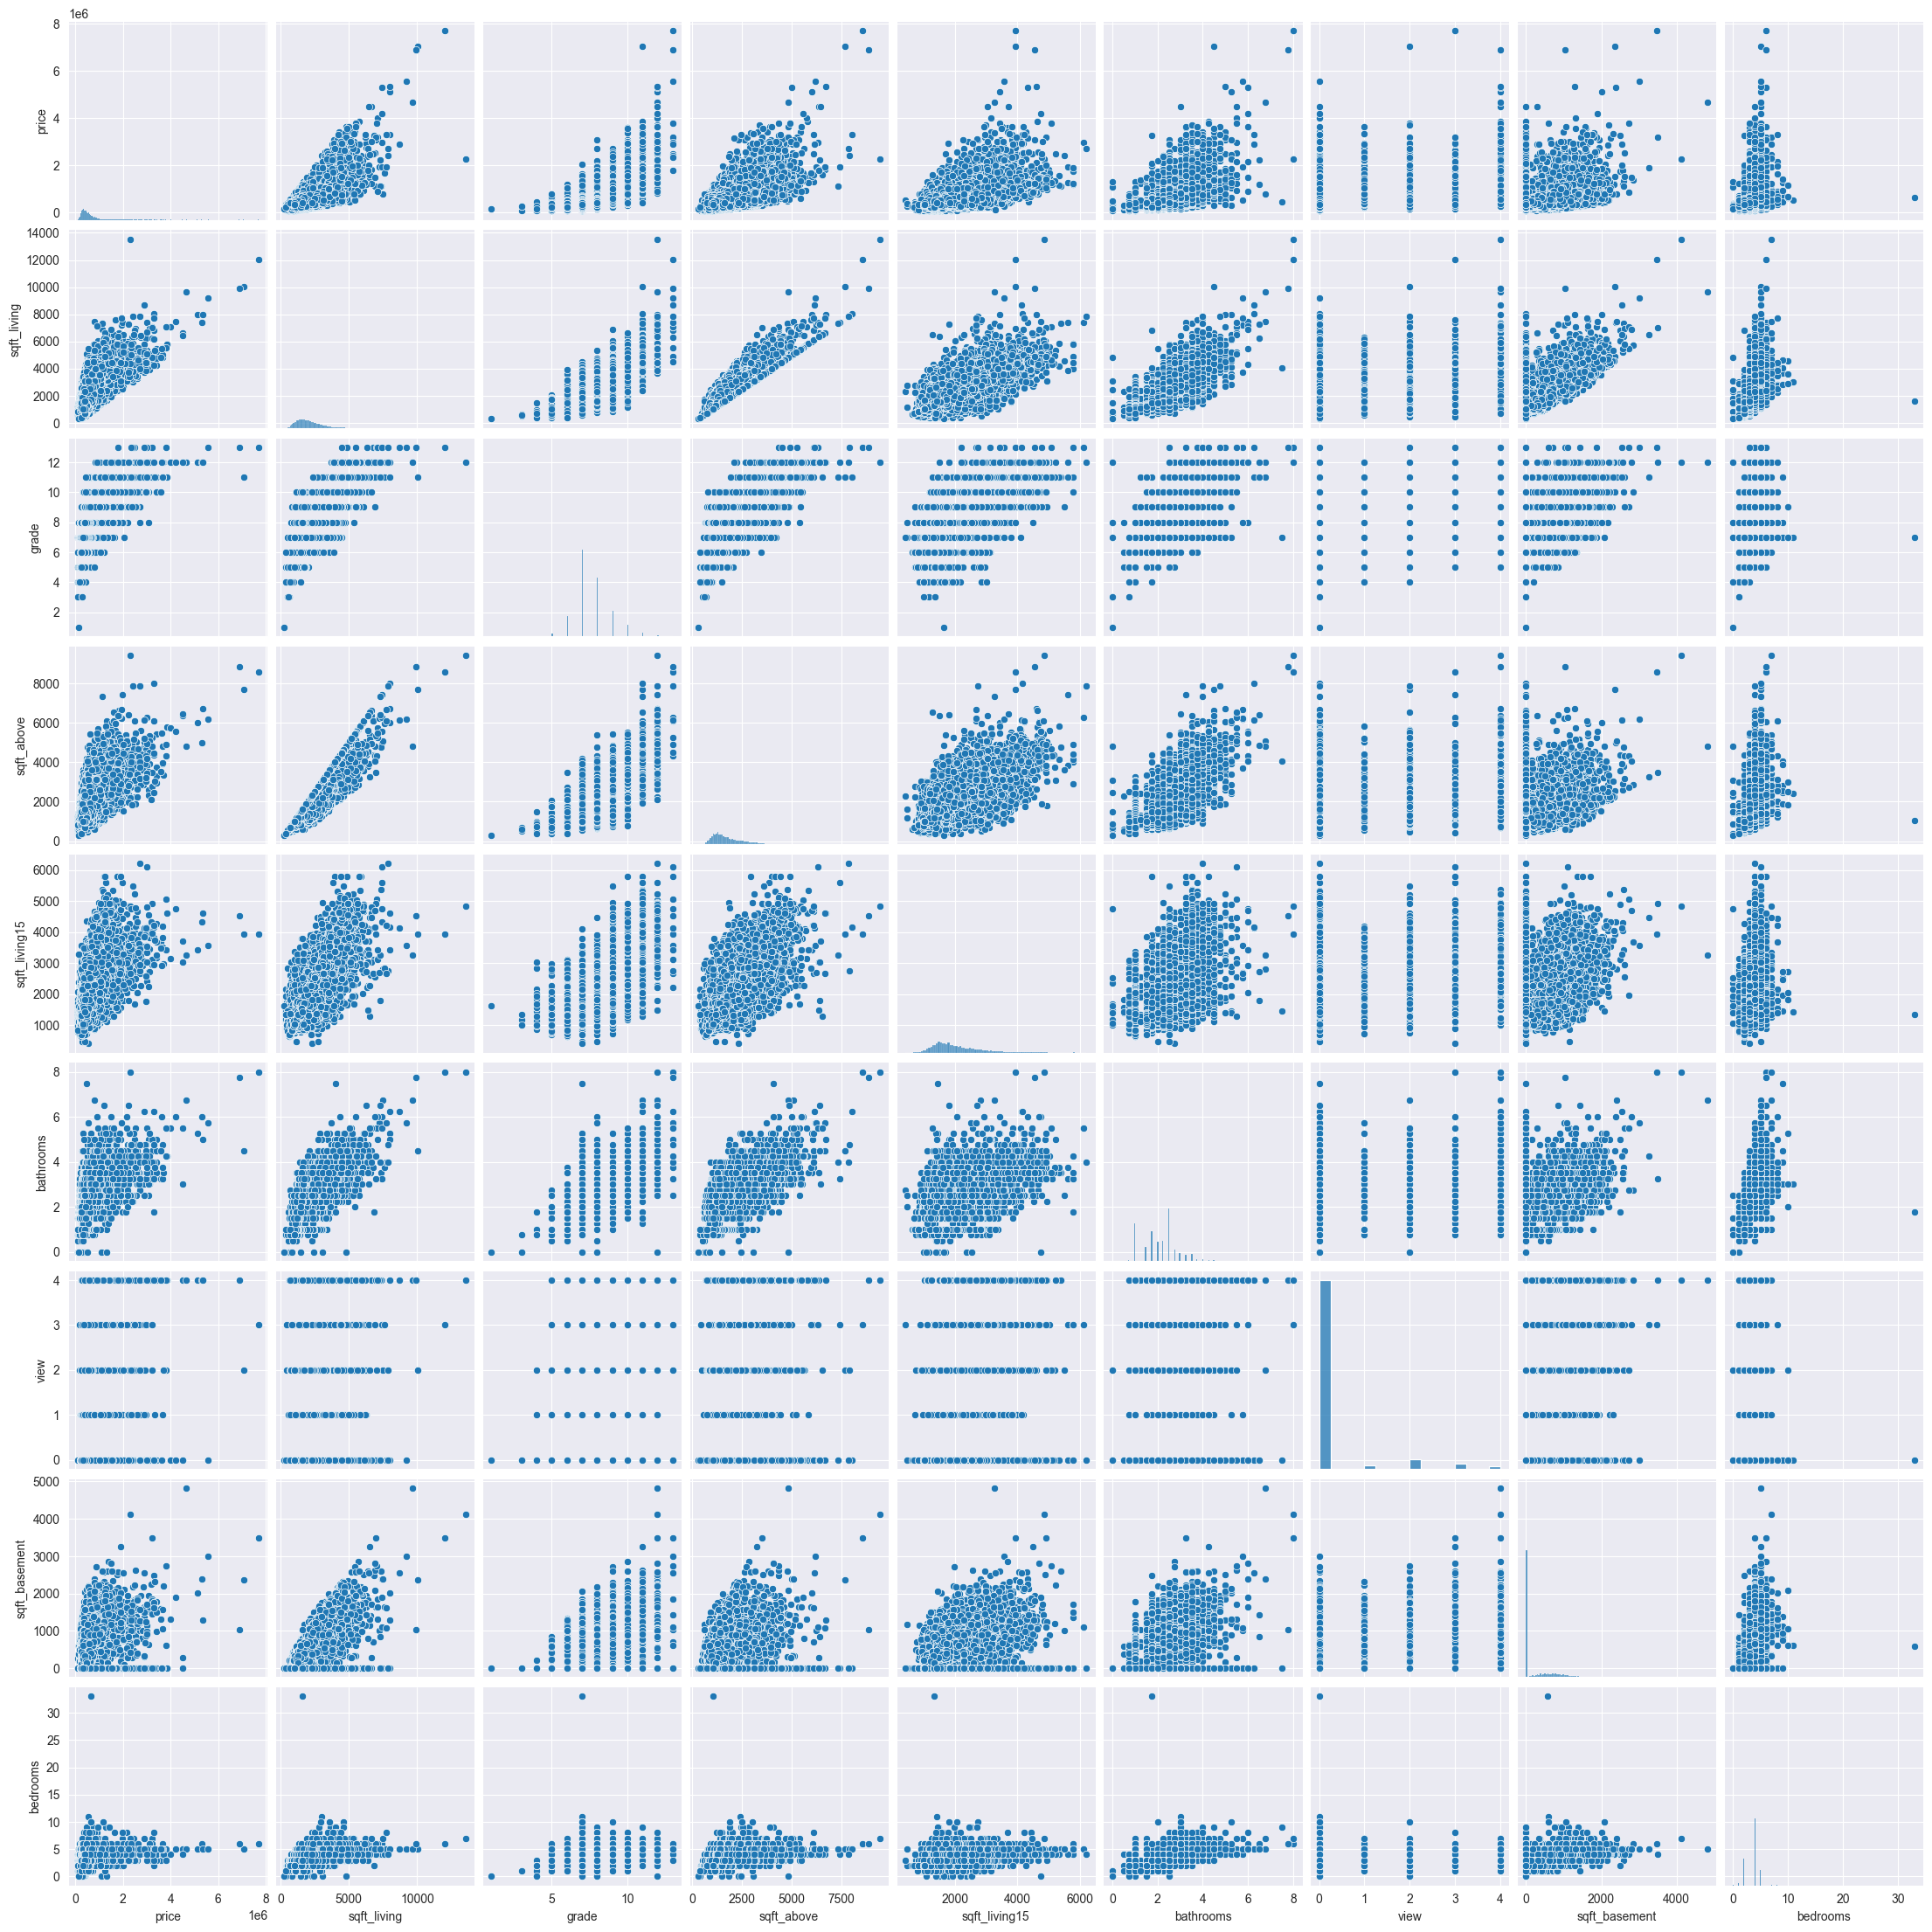

In [64]:
plt.clf()
plt.figure(figsize=(20,15))
sns.pairplot(data[most_correlated_features])
plt.savefig('data/output/pairCorr.png')

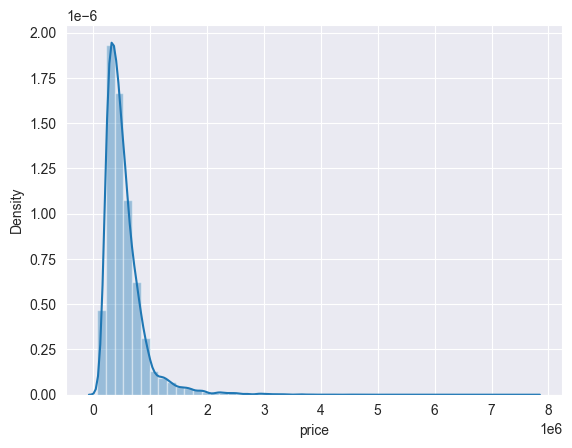

In [65]:
plt.clf()
sns.distplot(data['price'])
plt.savefig('data/output/priceGraphic.png')

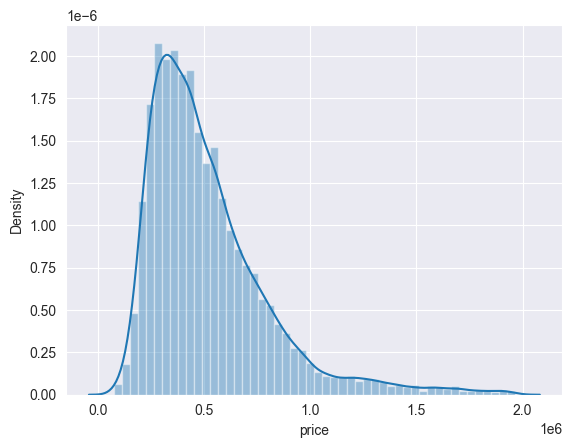

In [66]:
data = data.sort_values('price', ascending=False).iloc[216:]
plt.clf()
sns.distplot(data['price'])
plt.savefig('data/output/priceGraphicFix.png')

In [67]:
target = data['price']
feature = data.drop('price', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.25, 
                                                    random_state=52)
print(f"Train size: {X_train.shape}\nTest size: {X_test.shape}")

Train size: (16047, 18)
Test size: (5350, 18)


In [68]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=51235)
params = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "positive": [True, False]
}
linear_model = GridSearchCV(LinearRegression(), params, n_jobs=-1, cv=cv, verbose=3)
linear_result = linear_model.fit(X_train, y_train)
print(f"Best score: {linear_result.best_score_}\nBest params: {linear_result.best_params_}")

Fitting 30 folds for each of 8 candidates, totalling 240 fits
Best score: 0.7148786132962894
Best params: {'copy_X': True, 'fit_intercept': False, 'positive': False}


In [69]:
from sklearn.linear_model import Ridge
params = {
    'alpha': [0.99],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "max_iter": [i for i in range(5000, 25000, 5000)],
    "positive": [True, False]
}

ridge_model = GridSearchCV(Ridge(), params, n_jobs=-1, cv=cv, verbose=1)
ridge_result = ridge_model.fit(X_train, y_train)
print(f"Best score: {ridge_result.best_score_}\nBest params: {ridge_result.best_params_}")

Fitting 30 folds for each of 32 candidates, totalling 960 fits
Best score: 0.7148801005324077
Best params: {'alpha': 0.99, 'copy_X': True, 'fit_intercept': False, 'max_iter': 5000, 'positive': False}


In [70]:
from sklearn.ensemble import RandomForestRegressor

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=51235)
# Best score: 0.8680377403271733
# Best params: {'max_depth': 55, 'max_leaf_nodes': 1000, 'min_samples_split': 5, 'n_estimators': 27}

# Best score: 0.8719153517396909
# Best params: {'max_depth': 55, 'max_leaf_nodes': 2000, 'min_samples_split': 5, 'n_estimators': 45}

# Best score: 0.8742850830643718
# Best params: {'max_depth': 45, 'max_leaf_nodes': 3000, 'min_samples_split': 5, 'n_estimators': 65}
params = {
    'n_estimators': [120],
    'max_depth': [45],
    'min_samples_split': [5],
    'max_leaf_nodes': [3000]
}

rf_model = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1, cv=cv, verbose=10)
rf_result = rf_model.fit(X_train, y_train)
print(f"Best score: {rf_result.best_score_}\nBest params: {rf_result.best_params_}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best score: 0.8703983944260141
Best params: {'max_depth': 45, 'max_leaf_nodes': 3000, 'min_samples_split': 5, 'n_estimators': 120}


In [90]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1200, learning_rate=0.2, depth=10, verbose=10)
cat_model.fit(X_train, y_train)
print(f"Best score: {cat_model.score(X_train, y_train.to_numpy())}")

0:	learn: 248954.2838500	total: 10.6ms	remaining: 12.7s
10:	learn: 114427.1878370	total: 88.5ms	remaining: 9.56s
20:	learn: 95940.4562949	total: 168ms	remaining: 9.44s
30:	learn: 88140.0959388	total: 266ms	remaining: 10s
40:	learn: 83971.5315545	total: 345ms	remaining: 9.74s
50:	learn: 80095.7565736	total: 415ms	remaining: 9.35s
60:	learn: 76271.4127602	total: 487ms	remaining: 9.09s
70:	learn: 73588.7442325	total: 558ms	remaining: 8.87s
80:	learn: 70989.9385047	total: 629ms	remaining: 8.69s
90:	learn: 68662.0773472	total: 705ms	remaining: 8.59s
100:	learn: 66493.1351919	total: 777ms	remaining: 8.46s
110:	learn: 64199.1233045	total: 848ms	remaining: 8.32s
120:	learn: 62199.4704374	total: 922ms	remaining: 8.23s
130:	learn: 60124.5731392	total: 998ms	remaining: 8.14s
140:	learn: 58451.4750867	total: 1.07s	remaining: 8.02s
150:	learn: 56584.6579137	total: 1.14s	remaining: 7.91s
160:	learn: 55225.2536049	total: 1.22s	remaining: 7.85s
170:	learn: 54238.1349212	total: 1.28s	remaining: 7.73s
1

In [71]:
# from sklearn.ensemble import RandomForestRegressor
# 
# cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=51235)
# rf_results = pd.DataFrame(columns=['n_estimators', 'R2'])
# rf_results.loc[len(rf_results)] = [10.0, 0.855734]
# rf_results.loc[len(rf_results)] = [15.0, 0.861942]
# rf_results.loc[len(rf_results)] = [20.0,  0.866018]
# rf_results.loc[len(rf_results)] = [25.0,  0.866260]
# rf_results.loc[len(rf_results)] = [30.0,  0.866776]
# rf_results.loc[len(rf_results)] = [35.0,  0.867495]
# rf_results.loc[len(rf_results)] = [40.0,  0.868615]
# rf_results.loc[len(rf_results)] = [45.0,  0.868616]
# rf_results.loc[len(rf_results)] = [50.0,  0.869369]
# rf_results.loc[len(rf_results)] = [55.0,  0.869019]
# rf_results.loc[len(rf_results)] = [60.0,  0.870395]
# rf_results.loc[len(rf_results)] = [65.0,  0.869613]
# rf_results.loc[len(rf_results)] = [70.0,  0.869950]
# rf_results.loc[len(rf_results)] = [75.0,  0.869562]
# rf_results.loc[len(rf_results)] = [80.0,  0.870099]
# rf_results.loc[len(rf_results)] = [85.0,  0.869629]
# rf_results.loc[len(rf_results)] = [90.0,  0.870494]
# rf_results.loc[len(rf_results)] = [95.0,  0.869992]
# rf_results.loc[len(rf_results)] = [100.0,  0.870559]
# rf_results.loc[len(rf_results)] = [105.0,  0.870498]
# rf_results.loc[len(rf_results)] = [110.0,  0.870717]
# rf_results.loc[len(rf_results)] = [115.0,  0.869711]
# rf_results.loc[len(rf_results)] = [120.0,  0.871293]
# rf_results.loc[len(rf_results)] = [125.0,  0.870413]
# rf_results.loc[len(rf_results)] = [130.0,  0.871282]
# rf_results.loc[len(rf_results)] = [135.0,  0.871110]
# rf_results.loc[len(rf_results)] = [140.0,  0.870973]
# rf_results.loc[len(rf_results)] = [145.0,  0.870719]
# for i in range(150, 255, 5):
#     params = {
#     'n_estimators': [i],
#     'max_depth': [45],
#     'min_samples_split': [5],
#     'max_leaf_nodes': [3000]
#     }
#     rf_model = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1, cv=cv, verbose=10)
#     rf_result = rf_model.fit(X_train, y_train)
#     rf_results.loc[len(rf_results)] = [i, rf_result.best_score_]
#     
# plt.clf()
# plt.xlabel('n_estimator')
# plt.ylabel('R2-score')
# plt.plot(rf_results['n_estimators'], rf_results['R2'])
# plt.savefig('data/output/n_estimators.png')

In [99]:
from sklearn.metrics import mean_absolute_error
mean_price = 540088.1
def model_graphic(title, model, picture_name):
    plt.clf()
    if title == 'CatBoost':
        plt.scatter(y_test, model.predict(X_test), color="b")
    else:
        plt.scatter(y_test, model.best_estimator_.predict(X_test), color="b")
    plt.title(title)
    plt.xlabel('y_test')
    plt.ylabel('predict')
    plt.plot(y_test, y_test, color='r')
    plt.savefig(f'data/output/{picture_name}.png')
    
def model_results_info(model_name, predictions):
    mae = mean_absolute_error(y_test, predictions) 
    mse = mean_squared_error(y_test, predictions) 
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f"Model: {model_name}\n"
          f"MAE: {mae}, in %: {round(mae/mean_price*100, 2)}%\n"
          f"MSE: {mse}\n"
          f"RMSE: {rmse}\n\n"
          f"R2-score: {r2_score(y_test, predictions)}\n"
          f"{'-'*100}")

In [100]:
linear_predictions = linear_model.best_estimator_.predict(X_test)
ridge_predictions = ridge_model.best_estimator_.predict(X_test)
rf_predictions = rf_model.best_estimator_.predict(X_test)
cat_predictions = cat_model.predict(X_test)

model_results_info('linear_model', linear_predictions)
model_results_info('ridge_model', ridge_predictions)
model_results_info('random_forest_model', rf_predictions)
model_results_info('cat_model', cat_predictions)


Model: linear_model
MAE: 107105.03138950898, in %: 19.83%
MSE: 23652943407.21914
RMSE: 153795.13453688688

R2-score: 0.7092447539577369
----------------------------------------------------------------------------------------------------
Model: ridge_model
MAE: 107092.99257722944, in %: 19.83%
MSE: 23656799782.081394
RMSE: 153807.67140192128

R2-score: 0.709197349235094
----------------------------------------------------------------------------------------------------
Model: random_forest_model
MAE: 62090.443322150975, in %: 11.5%
MSE: 9950908378.670315
RMSE: 99754.23990322574

R2-score: 0.8776778532729569
----------------------------------------------------------------------------------------------------
Model: cat_model
MAE: 58269.42230305469, in %: 10.79%
MSE: 8031476269.251712
RMSE: 89618.50405609162

R2-score: 0.9012725892695388
----------------------------------------------------------------------------------------------------


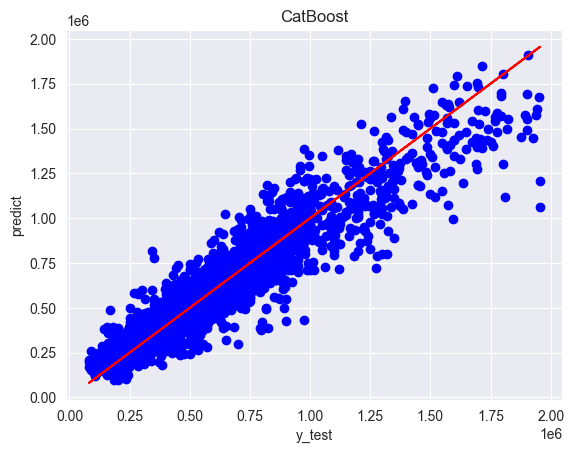

In [98]:
model_graphic('Linear', linear_model, 'LinearRegression')
model_graphic('Ridge', ridge_model, 'RidgeRegression')
model_graphic('RandomForest', rf_model, 'RandomForestRegression')
model_graphic('CatBoost', cat_model, 'CatBoostRegressor')
# plt.clf()
# plt.scatter(y_test, rf_model.best_estimator_.predict(X_test), color="b")
# plt.title('Random Forest')
# plt.xlabel('y_test')
# plt.ylabel('predict')
# plt.plot(y_test, y_test, color='r')
# plt.savefig('data/output/RandomForestRegression.png')
# 
# plt.clf()
# plt.scatter(y_test, linear_model.best_estimator_.predict(X_test), color="b")
# plt.title('Linear')
# plt.plot(y_test, y_test, color='r')
# plt.savefig('data/output/LinearRegression.png')
# 
# plt.clf()
# plt.scatter(y_test, ridge_model.best_estimator_.predict(X_test), color="b")
# plt.title('Ridge')
# plt.plot(y_test, y_test, color='r')
# plt.savefig('data/output/RidgeRegression.png')

In [75]:
rf_model.best_estimator_.predict(X_test)

array([1060179.6172619 ,  438432.67424636,  529243.87616439, ...,
        320442.79681586,  711750.60873118,  751926.90620905])